In [84]:
import pandas as pd
import numpy as np
import re
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# options
pd.set_option('display.max_columns', None)

In [67]:
# Load original data
df = pd.read_csv(r'data/fifa21_male2.csv',
                dtype={'Hits': 'object'})
df.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [68]:
# Standardize columns' names and change index
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_').str.replace('&', 'and')
if df.id.is_unique:
    df = df.set_index('id')
df.head()

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_and_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


#### Data Cleaning
##### First Approach - drop all categorical missing data and sobsitute numerical with mean
##### Explore unicity of values to understand if more data can be dropped

In [69]:
# Explore nan values
orig_rows = df.shape[0]
nan_cols = [col for col in df.columns if df[col].isna().sum() > 0]
nan_counts = df[nan_cols].isna().sum()
nan_dtypes = df[nan_cols].dtypes
df_nan = pd.concat([nan_counts, nan_dtypes], axis=1)
df_nan.columns = ['nan_count', 'dtype']
df_nan

,nan_count,dtype
club,23,object
position,413,object
club_logo,23,object
joined,58,object
loan_date_end,16215,object
volleys,58,float64
curve,58,float64
agility,58,float64
balance,58,float64
jumping,58,float64


In [70]:
# It seems feasible to drop all categorical NaN values except the ones on loan_date_end. 
# The entire column will be dropped due to the high number of NaN values and probable uselessness for our predictions
df = df.drop(['loan_date_end'], axis=1)
nan_cols.remove('loan_date_end')
cat_nan_cols = [col for col in nan_cols if df[col].dtype=='object']  
df = df.dropna(subset=cat_nan_cols)

In [71]:
# replace missing numeric data with the simple average of the column
# a better analysis should at least try to get better values, for example clustering
# the player by their roles (vision and positioning attributes are different if player
# is a defender or attacker)
nan_cols = [col for col in df.columns if df[col].isna().sum() > 0]
df[nan_cols] = df[nan_cols].fillna(df.composure.mean())
print('Dropping missing values has led to a reduction of rows by {} %'.format(
    round((orig_rows-df.shape[0])/orig_rows, 2)
))

Dropping missing values has led to a reduction of rows by 0.03 %


#### EDA starts

##### Study the values count for each columns 
##### Interface this knowledhe with columns.csv description to understand:
#### Which column could be dropped beacuse is insignificant
#### Which column could be dropped sue to its unicity (not apporting any features)


In [72]:
# Explore value counts of our columns
# Write data to a file for accurate exploration
# A one-line description will also be displayed in order to understand column value
df_desc = pd.read_csv('columns.csv', index_col=0)
orig_stdout = sys.stdout
with open('fifa_vc.txt', 'w', encoding='utf-8') as f:
    sys.stdout = f
    for col in df.columns:
        print(df_desc.loc[col].values[0].lstrip())
        print(df[col].value_counts(), end='\n'*3)
    sys.stdout = orig_stdout
    f.close()

In [73]:
# Standardization of some columns with simple methods:
# height --> to SI units (cm)
def to_cm(lst):
    """Converts height from feet, inches to cm"""
    return round(float(lst[0])*30.48+float(lst[1])*2.54, 0)
df.height = df.height.str.findall(r'(\d+)').apply(to_cm).astype('int64')

# weight --> to SI units (kg)
def to_kg(lbs):
    """Converts weight from lbs to kg"""
    lbs = lbs.replace('lbs', '')
    return round(int(lbs), 0)
df.weight = df.weight.apply(to_kg) # force integer

# value --> to euro
def to_float(value):
    """Converts string value to float number"""
    value = value.replace('€', '')
    if 'K' in value:
        return float(value.replace('K', '')) * 1e3
    elif 'M' in value:
        return float(value.replace('M', '')) * 1e6
    else:
        return float(value)
df.value = df.value.apply(to_float)

# wage --> to euro
df.wage = df.wage.apply(to_float)

#release clause --> to euro
df.release_clause = df.release_clause.apply(to_float)

#hits --> to number
df.hits = df.hits.apply(to_float)

# Handling the star statistics
star_stats = ['w/f', 'sm', 'ir']
for col in star_stats:
    df[col] = df[col].str[0].astype('int64')


In [74]:
# Functions for logic on 'contract' columns
def extract_start(contract):
    """Extract start year of contract"""
    if len(contract) == 0:
        return np.nan # no years is found
    elif len(contract) == 2: 
        if int(contract[0])>1900 and int(contract[0])<=int(contract[1]):
            return int(contract[0]) # start year is found
        else:
            return int(contract[1]) # only start year is present
    else:
        # lenght=3
        contract = np.array(contract).astype('int64')
        contract = contract[(contract>2000) & (contract < 2023)] # filter out values
        if len(contract) == 2:
            if int(contract[0])>1900 and int(contract[0])<=int(contract[1]):
                return int(contract[0]) # start year is found
            else:
                return contract[0]+'_verify3'
        elif len(contract) == 1: # only start year is found
            return int(contract[0])

def extract_end(contract):
    """Extract end year of contract"""
    if len(contract) == 0:
        return np.nan # no years is found
    elif len(contract) == 2: 
        if int(contract[0])>1900 and int(contract[0])<=int(contract[1]):
            return int(contract[1]) # end year is found
        else:
            return np.nan # end year is not present
    else:
        # lenght=3
        contract = np.array(contract).astype('int64')
        contract = contract[(contract>2000) & (contract < 2023)] # filter out values
        if len(contract) == 2:
            if int(contract[0])>1900 and int(contract[0])<=int(contract[1]):
                return int(contract[1]) # end year is found
            else:
                return contract[1]+'_verify3'
        elif len(contract) == 1: 
            return np.nan # end year is not present

In [75]:
# Logic for contract columns: range years of contract are extracted in following format:
# contract --> contract_start    contract_end
# contract column will be dropped

# Drop nan values found from contract start and
# replace missing value from contract_end with actual year (meaning contract is not finished)
# Then drop contract column
df.insert(list(df.columns).index('contract'), 'contract_start', 
            df.contract.str.findall(r'(\d+)').apply(extract_start))
df.insert(list(df.columns).index('contract_start'), 'contract_end', 
            df.contract.str.findall(r'(\d+)').apply(extract_end))
df.contract_end = df.contract_end.fillna(2022) # maybe better use datetime library
df = df.dropna()

In [76]:
# Function for logic on range stats
def range_stat(rs):
    """ Returns ranged stat in format 'min_stat, max_stat' """
    values = re.findall(r'\d+', rs)
    if '+-' in rs:
        min_value = str(int(values[0]) - int(values[1]))
    elif '+' in rs and '-' not in rs:
        min_value = values[0]
    max_value = str(int(values[0]) + int(values[1]))
    return min_value + ',' + max_value

In [77]:
# Some statistics are presented in the form:
# value+-range 
# These columns will be separated into a value_min and value_max
# In order to treat them numerically
# Original columns will be dropped
range_stats = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 
                'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 
                'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 
                'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 
                'rcb', 'rb', 'gk']

for col in range_stats:
    df[col] = df[col].apply(range_stat)
    df.insert(list(df.columns).index(col), col+'_min',
        df[col].str.split(',').str[0].astype('int64'))
    df.insert(list(df.columns).index(col), col+'_max',
        df[col].str.split(',').str[1].astype('int64'))
    df = df.drop(col, axis=1)

In [78]:
# The following columns have been identified as useless for 
# my target predictions
cols_to_drop = ['player_photo', 'club_logo', 'flag_photo', 
                'gender', 'contract'] # all players are male
df = df.drop(cols_to_drop, axis=1)
# Now we should have our final dataset
df = df.reset_index(drop=True)
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16332 entries, 0 to 16331
Data columns (total 129 columns):
 #    Column             Non-Null Count  Dtype  
---   ------             --------------  -----  
 0    name               16332 non-null  object 
 1    age                16332 non-null  int64  
 2    ova                16332 non-null  int64  
 3    nationality        16332 non-null  object 
 4    club               16332 non-null  object 
 5    bov                16332 non-null  int64  
 6    bp                 16332 non-null  object 
 7    position           16332 non-null  object 
 8    pot                16332 non-null  int64  
 9    team_and_contract  16332 non-null  object 
 10   height             16332 non-null  int64  
 11   weight             16332 non-null  int64  
 12   foot               16332 non-null  object 
 13   growth             16332 non-null  int64  
 14   joined             16332 non-null  object 
 15   value              16332 non-null  float64
 16   wa

In [ ]:
### EDA, some insight about the dataset:
# Nation wise rappresentation
# Age distribution
# Club with more outstanding ova
# Height to ova?
# Weight to ova?

# subset the datasets in order to predict
# predict ova
# perdict potential (without ova)
# predict player growth (without ova, without potential)
# predict value of player
# multi prediction??


#### Study multicollinearity
#### How to treat outliers

In [81]:
# Describe the numerical data statistically
df.describe().apply(lambda x: round(x,0))

,age,ova,bov,pot,height,weight,growth,value,wage,release_clause,contract_end,contract_start,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,ls_min,ls_max,st_min,st_max,rs_min,rs_max,lw_min,lw_max,lf_min,lf_max,cf_min,cf_max,rf_min,rf_max,rw_min,rw_max,lam_min,lam_max,cam_min,cam_max,ram_min,ram_max,lm_min,lm_max,lcm_min,lcm_max,cm_min,cm_max,rcm_min,rcm_max,rm_min,rm_max,lwb_min,lwb_max,ldm_min,ldm_max,cdm_min,cdm_max,rdm_min,rdm_max,rwb_min,rwb_max,lb_min,lb_max,lcb_min,lcb_max,cb_min,cb_max,rcb_min,rcb_max,rb_min,rb_max,gk_min,gk_max
count,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0,16332.0
mean,25.0,67.0,68.0,73.0,181.0,165.0,6.0,2671381.0,10793.0,4776076.0,2022.0,2018.0,258.0,52.0,48.0,54.0,60.0,45.0,266.0,58.0,50.0,44.0,54.0,61.0,324.0,66.0,66.0,65.0,63.0,65.0,302.0,60.0,65.0,63.0,65.0,49.0,261.0,57.0,47.0,52.0,55.0,50.0,60.0,142.0,47.0,48.0,46.0,77.0,15.0,15.0,15.0,15.0,16.0,1631.0,361.0,3.0,2.0,1.0,68.0,55.0,59.0,64.0,50.0,65.0,38.0,56.0,58.0,56.0,58.0,56.0,58.0,57.0,58.0,57.0,57.0,57.0,57.0,57.0,57.0,57.0,58.0,58.0,60.0,58.0,60.0,58.0,60.0,58.0,60.0,57.0,59.0,57.0,59.0,57.0,59.0,58.0,60.0,55.0,57.0,55.0,57.0,55.0,57.0,55.0,57.0,55.0,57.0,54.0,56.0,53.0,55.0,53.0,55.0,53.0,55.0,54.0,56.0,21.0,23.0
std,5.0,7.0,7.0,6.0,7.0,16.0,6.0,5476454.0,21491.0,10541239.0,1.0,2.0,72.0,18.0,19.0,17.0,14.0,18.0,76.0,18.0,18.0,17.0,15.0,16.0,54.0,15.0,14.0,14.0,9.0,14.0,49.0,13.0,12.0,15.0,13.0,19.0,62.0,17.0,21.0,19.0,14.0,16.0,12.0,61.0,20.0,21.0,21.0,80.0,17.0,16.0,16.0,16.0,17.0,259.0,40.0,1.0,1.0,0.0,11.0,14.0,10.0,10.0,17.0,10.0,170.0,13.0,13.0,13.0,13.0,13.0,13.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,15.0,14.0,15.0,14.0,15.0,14.0,13.0,13.0,14.0,14.0
min,16.0,45.0,44.0,47.0,155.0,110.0,0.0,0.0,0.0,0.0,2012.0,1990.0,42.0,6.0,3.0,5.0,7.0,4.0,43.0,5.0,4.0,5.0,9.0,5.0,122.0,12.0,13.0,14.0,24.0,17.0,128.0,15.0,22.0,11.0,16.0,4.0,50.0,9.0,4.0,2.0,10.0,7.0,12.0,20.0,3.0,5.0,6.0,5.0,1.0,1.0,1.0,1.0,1.0,731.0,228.0,1.0,1.0,1.0,25.0,16.0,25.0,28.0,13.0,27.0,3.0,15.0,16.0,15.0,16.0,15.0,16.0,14.0,14.0,15.0,15.0,15.0,15.0,15.0,15.0,14.0,14.0,15.0,17.0,15.0,17.0,15.0,17.0,15.0,17.0,15.0,17.0,15.0,17.0,15.0,17.0,15.0,17.0,14.0,16.0,16.0,18.0,16.0,18.0,16.0,18.0,14.0,16.0,14.0,15.0,16.0,18.0,16.0,18.0,16.0,18.0,14.0,15.0,8.0,9.0
25%,21.0,62.0,64.0,69.0,175.0,154.0,0.0,400000.0,2000.0,580000.0,2021.0,2017.0,231.0,40.0,33.0,46.0,56.0,32.0,232.0,53.0,37.0,32.0,45.0,57.0,296.0,59.0,59.0,57.0,57.0,57.0,272.0,50.0,58.0,56.0,58.0,35.0,234.0,45.0,26.0,43.0,46.0,40.0,53.0,85.0,30.

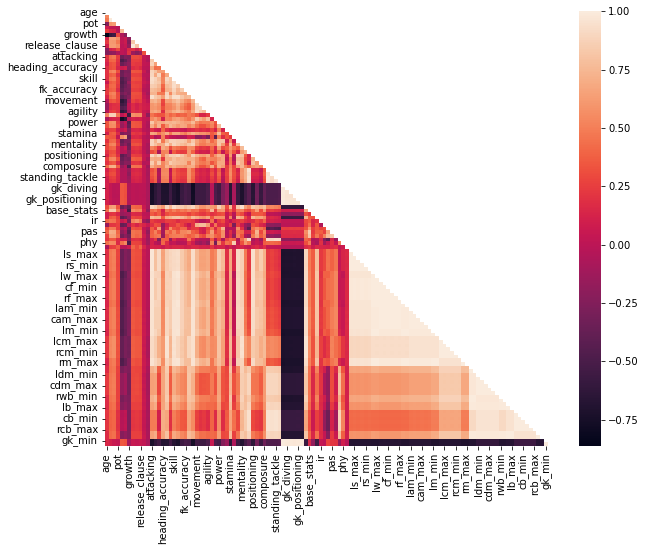

In [86]:
# Analyze Multicollinerity
def show_corr_heatmap(df, figsize, export_path='figs/corr_heatmap.png'):
    """Show andeExport half correlation matrix for the dataset in a .png figure 
    TODO: print couples with highest correlation and let user decide if remove one of them from
    dataset. In that case, returns a new copy of the DataFrame"""
    mask = np.zeros_like(df.corr()) # Matrix full of zeros with shape of df.corr()
    mask[np.triu_indices_from(mask)] = True # upper tridiagonal mask
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.heatmap(df.corr(), mask=mask, annot=False)
    if not os.path.isdir(export_path.split('/')[0]):
        os.makedirs(export_path.split('/')[0])
    plt.savefig(export_path, dpi=600)

show_corr_heatmap(df, (10, 8))

In [87]:
df.corr(method='pearson')

,age,ova,bov,pot,height,weight,growth,value,wage,release_clause,contract_end,contract_start,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,ls_min,ls_max,st_min,st_max,rs_min,rs_max,lw_min,lw_max,lf_min,lf_max,cf_min,cf_max,rf_min,rf_max,rw_min,rw_max,lam_min,lam_max,cam_min,cam_max,ram_min,ram_max,lm_min,lm_max,lcm_min,lcm_max,cm_min,cm_max,rcm_min,rcm_max,rm_min,rm_max,lwb_min,lwb_max,ldm_min,ldm_max,cdm_min,cdm_max,rdm_min,rdm_max,rwb_min,rwb_max,lb_min,lb_max,lcb_min,lcb_max,cb_min,cb_max,rcb_min,rcb_max,rb_min,rb_max,gk_min,gk_max
age,1.000000,0.529387,0.471018,-0.240001,0.088701,0.250448,-0.863449,0.125829,0.225338,0.104287,-0.227171,-0.252167,0.199908,0.161739,0.117950,0.181305,0.193552,0.196089,0.184670,0.057448,0.191557,0.229187,0.233567,0.137788,-0.023089,-0.160377,-0.154185,-0.019711,0.512518,-0.076156,0.339018,0.325475,0.209046,0.101783,0.356026,0.200997,0.284042,0.280304,0.193508,0.133192,0.246447,0.197160,0.421882,0.125889,0.165979,0.113491,0.092865,0.115516,0.111812,0.112906,0.112789,0.122456,0.109995,0.303009,0.430615,0.087157,0.095387,0.390433,-0.151507,0.310603,0.400061,0.254991,0.227334,0.447988,-0.076640,0.189481,0.181401,0.189481,0.181401,0.189481,0.181401,0.127432,0.130739,0.159072,0.161733,0.159072,0.161733,0.159072,0.161733,0.127432,0.130739,0.164599,0.158710,0.164599,0.158710,0.164599,0.158710,0.138786,0.133209,0.224422,0.219570,0.224422,0.219570,0.224422,0.219570,0.138786,0.133209,0.170827,0.168699,0.234087,0.231501,0.234087,0.231501,0.234087,0.231501,0.170827,0.168699,0.165437,0.164683,0.216495,0.209152,0.216495,0.209152,0.216495,0.209152,0.165437,0.164683,0.149236,0.147594
ova,0.529387,1.000000,0.986300,0.588490,0.024566,0.150810,-0.605608,0.651699,0.607532,0.617854,0.104128,-0.205450,0.438660,0.392044,0.308742,0.306290,0.499919,0.366145,0.449367,0.356874,0.404613,0.372893,0.487926,0.437612,0.316226,0.149678,0.159418,0.234292,0.874141,0.104039,0.558910,0.546116,0.263745,0.347891,0.338892,0.396023,0.500732,0.386203,0.304021,0.342411,0.513447,0.314154,0.705365,0.252617,0.294392,0.239378,0.211318,0.037837,0.037551,0.036799,0.031994,0.043632,0.036493,0.617875,0.836105,0.203336,0.357254,0.474148,0.208719,0.489725,0.702732,0.649197,0.346395,0.547398,0.242189,0.465979,0.468819,0.465979,0.468819,0.465979,0.468819,0.435689,0.435414,0.464007,0.464146,0.464007,0.464146,0.464007,0.464146,0.435689,0.435414,0.477648,0.478217,0.477648,0.478217,0.477648,0.478217,0.458706,0.459737,0.534115,0.536648,0.534115,0.536648,0.534115,0.536648,0.458706,0.459737,0.439815,0.442450,0.468011,0.470181,0.468011,0.470181,0.468011,0.470181,0.439815,0.442450,0.411812,0.414585,0.380332,0.382109,0.380332,0.382109,0.380332,0.382109,0.411812,0.414585,0.098357,0.100878
bov,0.471018,0.986300,1.000000,0.623219,0.014584,0.133284,-0.555194,0.659133,0.605955,0.626905,0.141797,-0.181521,0.471931,0.404565,0.341155,0.337316,0.540438,0.391947,0.481461,0.393809,0.424429,0.391092,0.520765,0.477417,0.348593,0.183714,0.193729,0.261708,0.874674,0.130778,0.585119,0.561583,0.268285,0.380759,0.337458,0.424854,0.529857,0.404197,0.318983,0.370545,0.535633,0.337669,0.722178,0.272327,0.314049,0.259384,0.229607,-0.009194,-0.009198,-0.009832,-0.014560,-0.002143,-0.009774,0.645398,0.833009,0.214643,0.385556,0.455438,0.217985,0.481544,0.693060,0.645316,0.351645,0.540664,0.257074,0.501672,0.506365,0.501672,0.506365,0.501672,0.506365,0.470635,0.470829,0.500039,0.500451,0.500039,0.500451,0.500039,0.500451,0.470635,0.470829,0.514482,0.516747,0.514482,0.516747,0.514482,0.516747,0.494359,0.497040,0.570984,0.574590,0.570984,0.57